## Importando as bibliotecas

- tensorflow: biublioteca para processamento de dados e contrução de CNN
- matplot: biblioteca de para geração de iamgens gráficas

In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Definindo a localização dos dados

Armazena o local onde os dados de treino e validação estão presentes

In [82]:
TRAIN_DIR = "../data/xray_images/train"

## Carregamento do dataset

- image_size: muda as imagens para o tamanho de 224X224 pixels
- batch_size: define o número de imagens por lote
- label_mode: separa todas as imagens em duas classes

In [91]:
train_data = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, image_size=(224, 224), batch_size=32, label_mode="binary"
)

Found 5216 files belonging to 2 classes.


##  Pré processamento das imagens

#### Noramalização

- normalization_layer: deffine para que os pixels da imagem sejam normalizados para valores entre 0 e 1

In [92]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))

- esta parte separa as imagens de suas classes

In [93]:
images, labels = next(iter(train_data))

#### Denfinindo e aplicando padrões de aumentação

- RandomFlip: inverte a imagem na horizontal
- RandomRotation: gira a imagem
- RandomZoom: dá zoom na imagem

In [94]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.05),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

augmented_images = data_augmentation(images, training=True)

## Plota as imagens após passarem pela aumentação de dados

- plt.figure: define uma imagem e controla o tamanho que ela vai aparecer na tela
- plt.subplot: define que será uma grade com 3X3 imagens e o índice da imagem (que muda a cada interação)
- plt.imshow: mostra a imagem
- plt.title: mostra o rótulo da imagem
- plt.axis:  deixa a visualização mais limpa (sem régua na imagem)

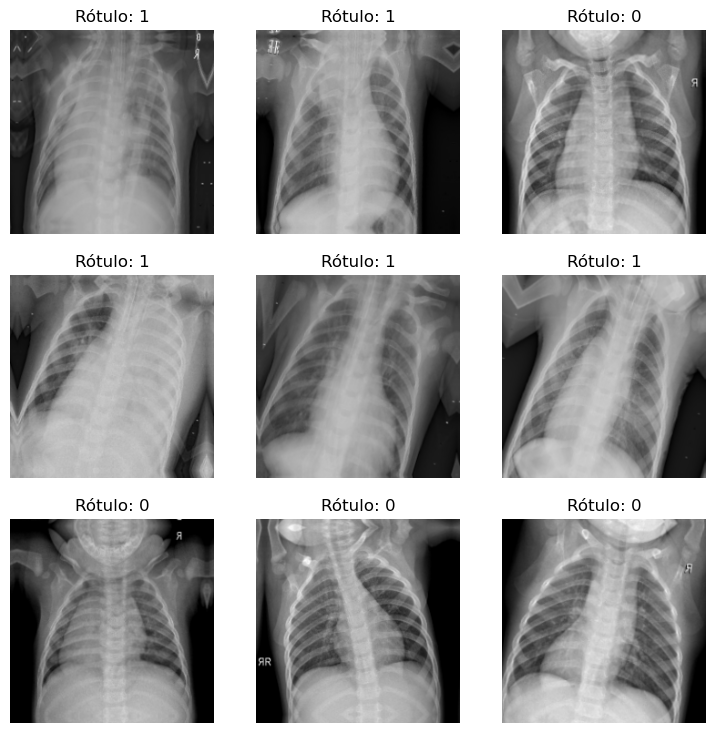

In [95]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Rótulo: {int(labels[i])}")
    plt.axis("off")